In [46]:
#15EE10022 Kumar Saurav
#DSP Assignment


In [47]:
# Library

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
np.set_printoptions(suppress=True) #prevent numpy exponential

In [49]:
def trans_mat(N):
    w=np.ones((N,N), dtype= np.complex64)
    wn= np.exp(-1j*2*np.pi/N)
    row = []
    val=1
    for i in range(N):
        row.append(val)
        val= val*wn
    row= np.array(row)
    #print(row)
    w[1]= row
    newRow= row
    for i in range(N-2):
        newRow= newRow*row
        w[i+2]= newRow
        #print(newRow)
    return w

In [50]:
# DFT

In [51]:
def my_dft(x):
    N= len(x)
    out= np.dot(trans_mat(N), x)
    return out

In [52]:
d= my_dft([1,2,2,1])
d

array([ 6.+0.j, -1.-1.j,  0.-0.j, -1.+1.j])

In [53]:
# IDFT

In [54]:
def my_idft(X):
    K=len(X)
    out= (1/K)*np.matmul(np.conjugate(trans_mat(K)), X)
    return np.absolute(out)

my_idft(d)

array([1., 2., 2., 1.])

In [55]:
# DCT

In [56]:
def my_dct(x):
    N=len(x)
    mat= np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            mat[i][j]= 2*np.cos(np.pi*(2*j+1)*i/(2*N))
    out= np.dot(mat, x)
    return out

x= [1,2,3,4]
c=my_dct(x)
c

array([20.        , -6.30864406, -0.        , -0.44834153])

In [57]:
# IDCT

In [58]:
def my_idct(X):
    K= len(X)
    #print(K)
    mat= np.zeros((K,K), dtype=np.float)
    for i in range(K):
        for j in range(K):
            if(j==0):
                mat[i][j]= (1/(2*K))*np.cos(np.pi*j*(2*i+1)/(2*K))
            else:
                mat[i][j]= (1/(1*K))*np.cos(np.pi*j*(2*i+1)/(2*K))
    out= np.dot(mat, X)
    return out

my_idct(c)

array([1., 2., 3., 4.])

In [59]:
# Haar

In [60]:
def my_haar(x):
    v= (int)(np.log2(len(x)))
    initial= np.array([[1.0]])
    const1= np.array([math.sqrt(0.5),math.sqrt(0.5)])
    const2= np.array([math.sqrt(0.5),-math.sqrt(0.5)])
    for i in range(1,v+1):
        shape= (int)(pow(2,i-1))
        upper= np.kron(initial, const1)
        lower= np.kron(np.identity(shape), const2)
        initial= np.concatenate((upper, lower), axis=0)
        #print(initial)
    #print(initial)
    out= np.dot(initial, x)
    return out

h= my_haar(x)
h

array([ 5.        , -2.        , -0.70710678, -0.70710678])

In [61]:
# IHaar

In [62]:
def my_ihaar(X):
    v= (int)(np.log2(len(X)))
    initial= np.array([[1.0]])
    const1= np.array([math.sqrt(0.5),math.sqrt(0.5)])
    const2= np.array([math.sqrt(0.5),-math.sqrt(0.5)])
    for i in range(1,v+1):
        shape= (int)(pow(2,i-1))
        upper= np.kron(initial, const1)
        lower= np.kron(np.identity(shape), const2)
        initial= np.concatenate((upper, lower), axis=0)
        #print(initial)
    N= len(X)
    initial= np.transpose(initial)
    out= np.dot(initial, X)
    return out

my_ihaar(h)

array([1., 2., 3., 4.])

In [63]:
def loss_dft(x, L):
    X_dft= my_dft(x)
    N= len(X_dft)
    low= int((N-L+1)/2)
    high= int((N-1+L)/2)
    for i in range(low, high+1):
        X_dft[i]= 0
    x1= my_idft(X_dft)
    val=np.sum(np.square(x-x1))
    return val/N

def loss_dct(x, L):
    X_dct= my_dct(x)
    N= len(X_dct)
    low= (int)((N-L))
    high= int((N-1))
    for i in range(low, high+1):
        X_dct[i]= 0
    x1= my_idct(X_dct)
    #print(x1)
    val=np.sum(np.square(x-x1))
    return val/N

def loss_haar(x, L):
    X_haar= my_haar(x)
    N= len(X_haar)
    low= (int)((N-L))
    high= int((N-1))
    for i in range(low, high+1):
        X_haar[i]= 0
    x1= my_ihaar(X_haar)
    val=np.sum(np.square(x-x1))
    return val/N

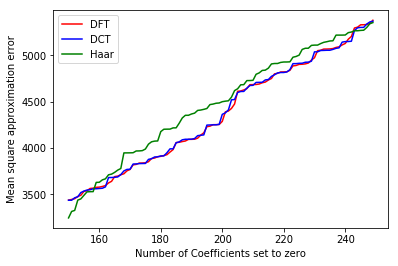

In [65]:
x= np.array(random.sample(range(256),256))
dct=[]
dft=[]
haar=[]
for i in range(150, 250):
    dct.append(loss_dct(x, i))
    dft.append(loss_dft(x, i))
    haar.append(loss_haar(x,i))

dct= np.array(dct)
dft= np.array(dft)
haar= np.array(haar)
plt.plot(range(150,250),dft, 'r', label="DFT")
plt.plot(range(150, 250),dct, 'b', label="DCT")
plt.plot(range(150, 250),haar, 'g', label= "Haar")
plt.xlabel("Number of Coefficients set to zero")
plt.ylabel("Mean square approximation error")
plt.legend()
plt.show()